# DSR - Batch 32 - Mini competition 
DRIVERDATA
https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/

## Prelude
## Making a cosy work environment
i.e. moving the desks around so we can be next to each other

## How do we want to work together?
Quick iterative process

## Defining strategy

### Day 1
- Define what kind of problem we're dealing with
- Data cleaning
    - columns analyzed to get sense of robustness
    - cleaning ideas
- Data visualization
- Develop pipeline 
 - Cleaning
 - Transformation / encoding
 - Model Training 
 - Model Fitting
- Baseline models ready and scored

### Day 2
- Feature engineering
- Model Twiking

### Day 3
- Last twiking
- Preparing presentaion

In [ ]:
#Synthetic Minority Oversampling Technique (SMOTE) 
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

print(sorted(Counter(y_resampled).items()))
[(0, 4674), (1, 4674), (2, 4674)]

clf_smote = LinearSVC().fit(X_resampled, y_resampled)

X_resampled, y_resampled = ADASYN().fit_resample(X, y)

print(sorted(Counter(y_resampled).items()))
[(0, 4673), (1, 4662), (2, 4674)]

clf_adasyn = LinearSVC().fit(X_resampled, y_resampled)

In [81]:

import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, SMOTENC

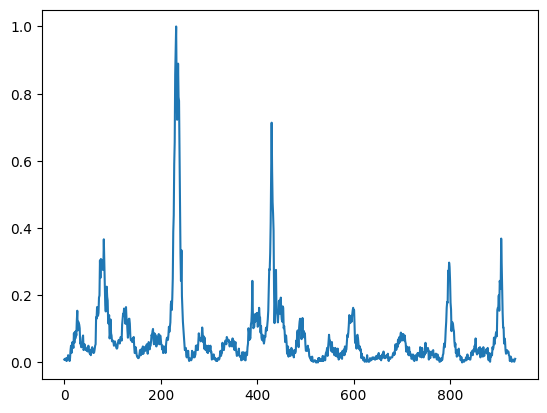

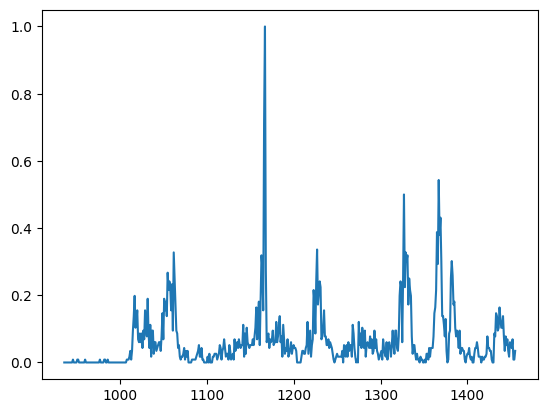

0.0    1177
1.0     279
Name: peak, dtype: int64


In [188]:
def add_norm_cases_and_peak_to_df(
    X, 
    Y,
    ):
    
    X['total_cases_normalized']=Y['total_cases']
    X['total_cases']=Y['total_cases']
    cities = X['city'].unique()
    for c in cities:
        ## converting numbers / ratio with inhabitants
        maxhere=Y['total_cases'].loc[Y['city']==c].max()
        indices = Y['total_cases'].loc[Y['city']==c].index
        for i in indices:
            X.loc[i, 'total_cases_normalized'] = (Y.loc[i, 'total_cases'])/maxhere

        # plotr to check the transformation
        # plt.plot(Y['total_cases'].loc[Y['city']==c])
        plt.show()
        plt.plot(X.loc[indices, 'total_cases_normalized'])
        plt.show()

    #adding new column in dataframe
    X['peak']=X['total_cases_normalized']
    X.loc[(X['total_cases_normalized']>=0.1, 'peak')]=1
    X.loc[(X['total_cases_normalized']<0.1, 'peak')]=0
    print(X['peak'].value_counts())
    return X

# def oversample_smote_X_Y(X, Y, on='peak'):
##
official_trainX = pd.read_csv("./data/dengue_features_train.csv")
official_trainY = pd.read_csv("./data/dengue_labels_train.csv")

combined_X_Y = add_norm_cases_and_peak_to_df(official_trainX, official_trainY)

In [189]:
####
combined_X_Y.loc[combined_X_Y['city']=='sj', 'city']=0
combined_X_Y.loc[combined_X_Y['city']=='iq', 'city']=1

In [190]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

resampling_col = combined_X_Y.loc[:, "peak"]
# dropped_official_trainX = combined_X_Y.drop(columns=["peak", "city", "week_start_date"])
combined_X_Y = combined_X_Y.drop(columns=["peak", "week_start_date"])

pipe = make_pipeline(
    SimpleImputer(),
    SMOTE(sampling_strategy=0.5, random_state=42),
)
combined_X_Y.columns
upsampled_X, upsampled_y = pipe.fit_resample(combined_X_Y, resampling_col)
upsampled_X_df = pd.dataFrame(upsampled_X, combined_X_Y.columns)


AttributeError: module 'pandas' has no attribute 'daraFrame'

In [200]:
upsampled_X_df = pd.DataFrame(upsampled_X, columns=combined_X_Y.columns)
from_x_to_y = ['city', 'year', 'weekofyear', 'total_cases']
upsampled_Y_df = upsampled_X_df[from_x_to_y]

In [198]:
upsampled_X_df.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases_normalized,total_cases
0,0.0,1990.0,18.0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,0.008677,4.0
1,0.0,1990.0,19.0,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,0.010846,5.0
2,0.0,1990.0,20.0,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,0.008677,4.0
3,0.0,1990.0,21.0,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,0.006508,3.0
4,0.0,1990.0,22.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,0.013015,6.0


In [177]:
data.Frame(upsampled_X)

NameError: name 'data' is not defined

In [199]:
official_trainY

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1
